In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style="darkgrid")
plt.rcParams["figure.figsize"] = (20,5)

In [3]:
df = pd.read_csv(f'../../data/processed_filtered/formality/Formality_Emo_bucket.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Input,Output,Input_formality_bucket,Output_formality_bucket,Input_emo_bucket,Output_emo_bucket
0,0,1,"If not, then get a new girl freind.","if you don't, you'll have a new girl.",low,mid,high,high
1,1,3,"I have not seen it, but I would like to.","I didn't see it, but I'd like to.",high,mid,high,high
2,2,7,'Cos it don't mean a thing if you lookin' at m...,'coss it not mean anything if you look at my...,low,low,high,mid
3,3,19,It is most likely not a grenade.,it's probably not a bomb.,high,mid,high,mid
4,4,21,you might find on that u fancy and stick with ...,"for the rest of the year, you'll find it on yo...",low,high,high,high


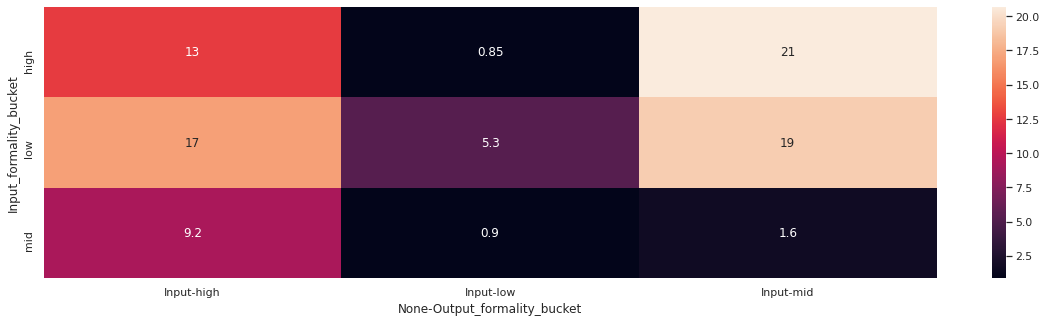

In [4]:
sns.heatmap(df.groupby(['Input_formality_bucket','Output_formality_bucket']).agg({'Input': 'count'}).reset_index().pivot('Input_formality_bucket', 'Output_formality_bucket')/1000, annot=True)
plt.show()

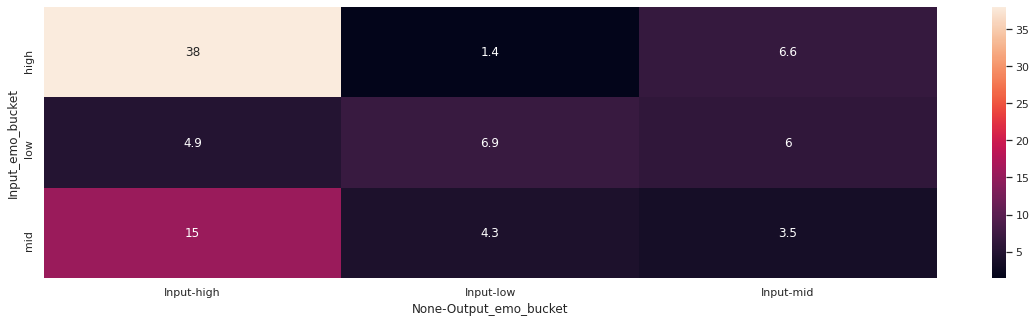

In [5]:
sns.heatmap(df.groupby(['Input_emo_bucket','Output_emo_bucket']).agg({'Input': 'count'}).reset_index().pivot('Input_emo_bucket', 'Output_emo_bucket')/1000, annot=True)
plt.show()

In [7]:
df = df.filter(['Output','Output_formality_bucket','Output_emo_bucket','Input','Input_formality_bucket','Input_emo_bucket'])
df = df.sample(frac=1).reset_index(drop=True)
df.columns = ['paraphrase','paraphrase_formality_bucket','paraphrase_emo_bucket','original','original_formality_bucket','original_emo_bucket']
df.head()

,paraphrase,paraphrase_formality_bucket,paraphrase_emo_bucket,original,original_formality_bucket,original_emo_bucket
0,"come back, you're not so familiar with me!",high,high,"Stand back please, you don't know me that well!",mid,high
1,wait until he's got a ball and asks us to get ...,mid,high,ask him out or wait until he grows balls and a...,low,mid
2,I guess Jessica Alba and Anna Kuournikova are.,mid,high,I suppose Jessica Alba and Anna Kournikova.,high,high
3,"i'm rap 2, I'm not making a demo yet, tho.",low,low,"i rap 2, aint made my demo yet tho",low,mid
4,"men do things because they want to, and he wan...",high,high,"Men do things because you want to, he wants to...",high,mid


In [8]:
train_samples = int(len(df)*0.8)
train_df = df[:train_samples]
dev_df = df[train_samples:]

In [11]:
train_df.to_csv('../../data/pseudo/formality_joint/train.csv', header=False,index=False)
dev_df.to_csv('../../data/pseudo/formality_joint/dev.csv', header=False, index=False)